In [1]:
import time
import pandas as pd

from src.domain.Collection import LiveJobCollection
from decimal import Decimal
from src.domain.Query import JobQuery

from src.DataFrameAnalyses import DataFrameChecker
from src.solvers.heuristics.giffler_thompson import solve as solve_gt

In [2]:
jobs = JobQuery.get_by_source_name_max_util_and_lt_arrival(
    source_name="Fisher and Thompson 10x10",
    max_bottleneck_utilization = Decimal("0.90"),
    arrival_limit= 60*24*2 # 2 days
)
#jobs = [job for job in all_jobs if job.earliest_start <=timespan]

jobs_collection = LiveJobCollection(jobs)

In [3]:
for job in list(jobs_collection.values())[:2]:
    print(f"{job.id = } {job.earliest_start = } {job.due_date = }")
    for operation in job.operations:
        print(f" {operation.position_number = } {operation.machine_name = } {operation.duration = }")

job.id = '01-09000-0000' job.earliest_start = 1440 job.due_date = 2994
 operation.position_number = 0 operation.machine_name = 'M02' operation.duration = 31
 operation.position_number = 1 operation.machine_name = 'M00' operation.duration = 86
 operation.position_number = 2 operation.machine_name = 'M01' operation.duration = 46
 operation.position_number = 3 operation.machine_name = 'M05' operation.duration = 74
 operation.position_number = 4 operation.machine_name = 'M04' operation.duration = 32
 operation.position_number = 5 operation.machine_name = 'M06' operation.duration = 88
 operation.position_number = 6 operation.machine_name = 'M08' operation.duration = 19
 operation.position_number = 7 operation.machine_name = 'M09' operation.duration = 48
 operation.position_number = 8 operation.machine_name = 'M07' operation.duration = 36
 operation.position_number = 9 operation.machine_name = 'M03' operation.duration = 79
job.id = '01-09000-0001' job.earliest_start = 1440 job.due_date = 265

In [4]:
from src.DataFrameAnalyses import DataFrameChecker
from src.solvers.heuristics.giffler_thompson import solve as solve_gt, solve_new

In [5]:
#schedule_collection = solve_gt(jobs_collection, priority_rule="EDD")
schedule_collection = solve_new(jobs_collection)
df_schedule = schedule_collection.to_operations_dataframe()
df_schedule

Giffler–Thompson mit Prioritätsregel "SPT" gestartet ...


Plan-Informationen:
  Anzahl Jobs        : 38
  Anzahl Maschinen   : 10
  Laufzeit           : ~0.00 Sekunden


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date
0,01-09000-0004,01-04,0,M02,1440,14,1454,207,1440,3824
1,01-09000-0004,01-04,1,M00,1454,6,1460,207,1440,3824
2,01-09000-0004,01-04,2,M01,1460,22,1482,207,1440,3824
3,01-09000-0004,01-04,3,M05,1482,61,1543,207,1440,3824
4,01-09000-0004,01-04,4,M03,1543,26,1569,207,1440,3824
...,...,...,...,...,...,...,...,...,...,...
375,01-09000-0035,01-02,5,M05,4906,10,4916,2647,2880,5127
376,01-09000-0035,01-02,6,M07,4916,12,4928,2647,2880,5127
377,01-09000-0035,01-02,7,M06,4928,89,5017,2647,2880,5127
378,01-09000-0035,01-02,8,M09,5017,45,5062,2647,2880,5127


In [6]:
DataFrameChecker.check_core_schedule_constraints(df_schedule)
DataFrameChecker.is_duration_correct(df_schedule)

+ No machine conflicts found.
+ All job operations are scheduled in non-overlapping, correct sequence.
+ All operations start at or after the earliest allowed time.
+ All durations match the difference between start and end.


True

In [7]:
df_jobs_metrics = schedule_collection.to_jobs_metrics_dataframe()
df_jobs_metrics

,Job,Routing_ID,Last Operation,End,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-09000-0004,01-04,9,2023,207,1440,3824,393,583,-1801,0,1801
1,01-09000-0013,01-04,9,2268,1113,1440,4036,393,828,-1768,0,1768
2,01-09000-0000,01-07,9,2960,0,1440,2994,539,1520,-34,0,34
3,01-09000-0006,01-00,9,2082,711,1440,3751,395,642,-1669,0,1669
4,01-09000-0016,01-07,9,3618,1420,1440,3486,539,2178,132,132,0
5,01-09000-0002,01-01,9,2363,118,1440,3357,510,923,-994,0,994
6,01-09000-0001,01-06,9,1975,50,1440,2651,416,535,-676,0,676
7,01-09000-0010,01-06,9,2309,946,1440,3326,416,869,-1017,0,1017
8,01-09000-0003,01-05,9,2505,164,1440,3027,496,1065,-522,0,522
9,01-09000-0015,01-01,9,2686,1357,1440,3802,510,1246,-1116,0,1116


In [8]:
from src.DataFrameAnalyses import DataFrameMetricsAnalyser

DataFrameMetricsAnalyser.get_jobs_metrics_aggregated(df_jobs_metrics, column="Tardiness")

Tardiness_Interval,0,0 - 60,60 - 120,>120
count,30,0,3,5


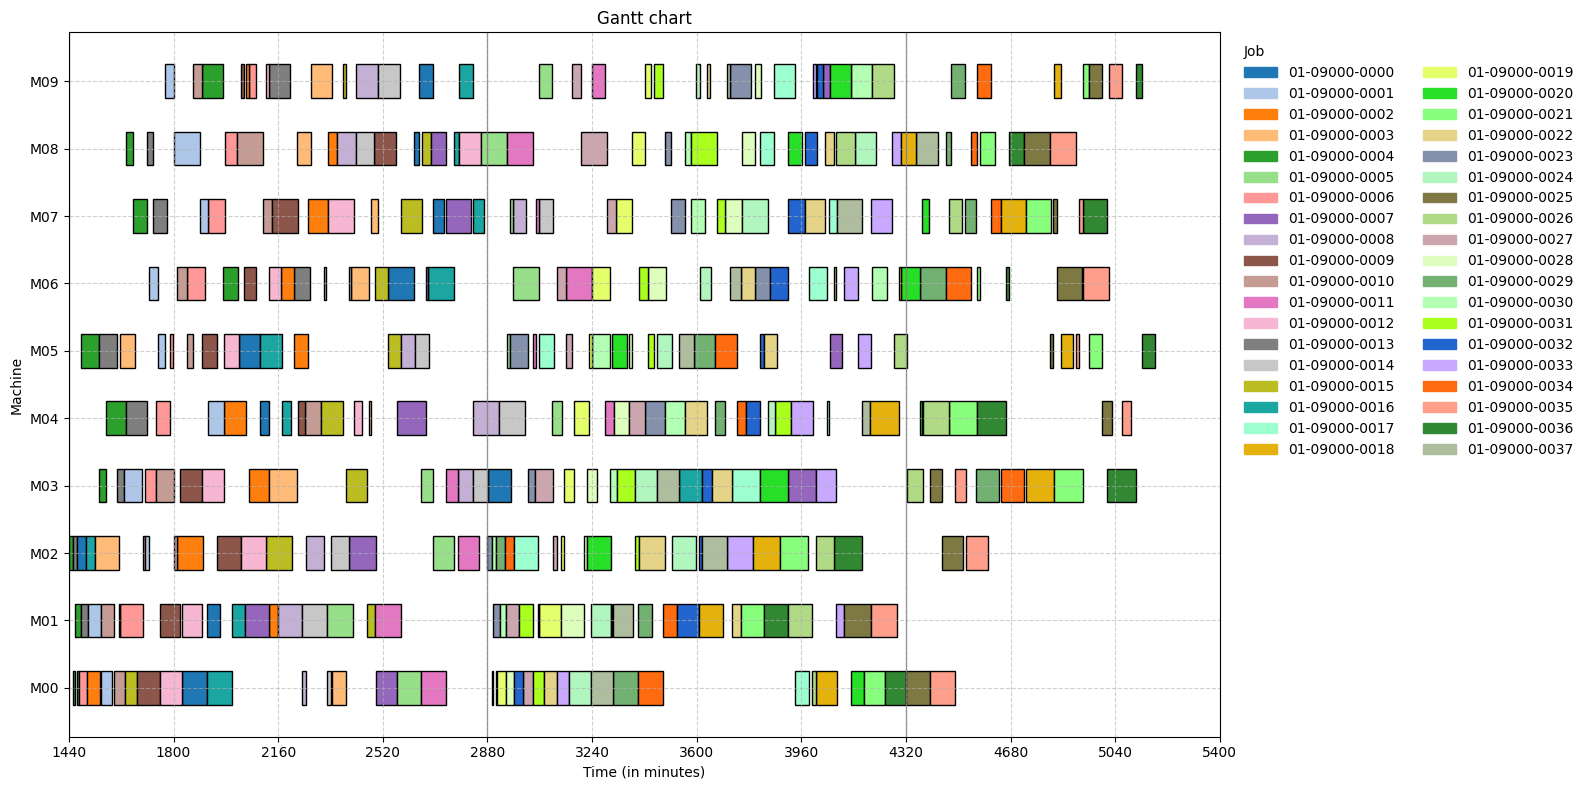

In [9]:
from matplotlib import pyplot as plt
from src.DataFrameAnalyses import DataFramePlotGenerator

DataFramePlotGenerator.get_gantt_chart_figure(df_schedule, perspective="Machine")
plt.show()